<a href="https://colab.research.google.com/github/luisespriella9/Deep-Learning-Hands-On-ANN-Course/blob/master/Artificial_Neural_Networks/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
tf.__version__

'2.3.0'

# Data Precprocessing

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.dropna()
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = dataset.drop(["RowNumber", "CustomerId", "Surname", "Exited"], axis=1)
y = dataset[["Exited"]]

## Encoding Categorical Data

Label Encoding Gender

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X["Gender"] = label_encoder.fit_transform(X["Gender"].values)

One hot encoding Geography

In [6]:
from sklearn.preprocessing import OneHotEncoder
hot_encoder = OneHotEncoder()
columns_transformed = hot_encoder.fit_transform(X[["Geography"]]).toarray()
ct_dataset = pd.DataFrame(columns_transformed, columns=hot_encoder.categories_)
X.drop(["Geography"], axis=1, inplace=True)
X = pd.concat([X, ct_dataset], axis=1)

In [7]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,"(France,)","(Germany,)","(Spain,)"
0,619,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


## Split dataset into Training set and Test set

In [8]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.10, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=0)

## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build Artificial Neural Network

In [10]:
ann = tf.keras.models.Sequential()
# input layer
ann.add(tf.keras.layers.Dense(units=X_train.shape[1], activation='relu'))
# second layer
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
# output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Compile

In [11]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train ANN

In [12]:
history = ann.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_val, y_val))

Epoch 1/15
240/240 [==============================] - 0s 2ms/step - loss: 0.5370 - accuracy: 0.7822 - val_loss: 4279.9194 - val_accuracy: 0.7822
Epoch 2/15
240/240 [==============================] - 0s 1ms/step - loss: 0.4508 - accuracy: 0.8003 - val_loss: 3306.7859 - val_accuracy: 0.7052
Epoch 3/15
240/240 [==============================] - 0s 1ms/step - loss: 0.4241 - accuracy: 0.8055 - val_loss: 3230.1111 - val_accuracy: 0.6867
Epoch 4/15
240/240 [==============================] - 0s 1ms/step - loss: 0.4104 - accuracy: 0.8140 - val_loss: 2977.3340 - val_accuracy: 0.6889
Epoch 5/15
240/240 [==============================] - 0s 1ms/step - loss: 0.3973 - accuracy: 0.8234 - val_loss: 2771.5833 - val_accuracy: 0.6652
Epoch 6/15
240/240 [==============================] - 0s 1ms/step - loss: 0.3839 - accuracy: 0.8369 - val_loss: 2751.3850 - val_accuracy: 0.6326
Epoch 7/15
240/240 [==============================] - 0s 1ms/step - loss: 0.3714 - accuracy: 0.8460 - val_loss: 4471.5591 - val_ac

# Evaluate Model

## Learning Curve

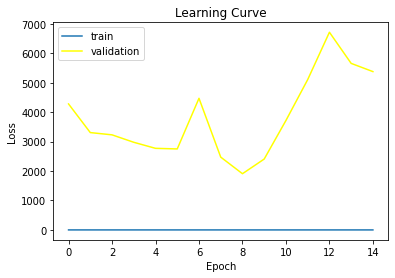

In [13]:
plt.plot([i for i in range(len(history.history["loss"]))], history.history["loss"], label="train")
plt.plot([i for i in range(len(history.history["val_loss"]))], history.history["val_loss"], label="validation", color="yellow")
plt.legend(loc="upper left")
plt.title("Learning Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

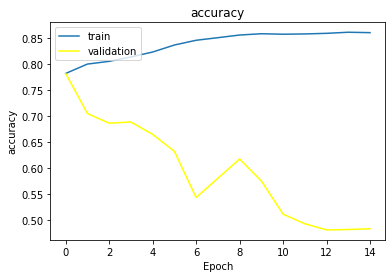

In [15]:
plt.plot([i for i in range(len(history.history["accuracy"]))], history.history["accuracy"], label="train")
plt.plot([i for i in range(len(history.history["val_accuracy"]))], history.history["val_accuracy"], label="validation", color="yellow")
plt.legend(loc="upper left")
plt.title("accuracy")
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.show()

## Predict Test Results

In [16]:
y_pred = ann.predict(X_test)
y_pred_binary = (y_pred > 0.5)

## Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_binary)
cm

array([[762,  27],
       [115,  96]])

In [18]:
accuracy_score(y_test, y_pred_binary)

0.858